<a href="https://colab.research.google.com/github/nikhilongo/data_science/blob/main/image_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
from keras.models import Sequential

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [17]:
x_train.shape

(50000, 32, 32, 3)

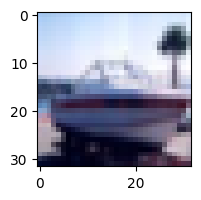

In [15]:
plt.figure(figsize=(4,2))
plt.imshow(x_train[6789])

In [33]:
cnn = Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=20)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3328 - loss: 3.0353
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5391 - loss: 1.2913
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6061 - loss: 1.1221
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6429 - loss: 1.0137
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6758 - loss: 0.9292
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7062 - loss: 0.8559
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7189 - loss: 0.7990
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7412 - loss: 0.7400
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7649 - loss: 0.6786
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7779 - loss: 0.6401
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7873 - loss: 0.6140
Epoch 12/20
1563/1563 ━━━━━━━━

In [35]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6191 - loss: 1.6977


[1.717039704322815, 0.6227999925613403]

In [36]:
predict = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
predict[0]

array([7.0792177e-09, 5.2427900e-08, 1.7538008e-05, 3.1077310e-01,
       2.2969424e-07, 6.8920410e-01, 2.9745627e-07, 4.6331261e-06,
       1.1007904e-08, 2.1504345e-08], dtype=float32)

In [38]:
predicted_y = []
for i in predict:
    predicted_y.append(np.argmax(i))


In [39]:
tf.math.confusion_matrix(y_test,predicted_y)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[709,  40,  61,  33,  19,  11,   9,   9,  75,  34],
       [ 24, 804,   7,   8,   2,  11,  12,   6,  35,  91],
       [ 97,   9, 435, 113,  87, 138,  52,  33,  19,  17],
       [ 40,  24,  61, 421,  50, 256,  67,  40,  12,  29],
       [ 40,   4,  89, 120, 468,  94,  65, 100,   9,  11],
       [ 11,   9,  56, 148,  39, 642,  27,  36,  11,  21],
       [ 14,  13,  42,  91,  45,  65, 691,  14,   8,  17],
       [ 35,   7,  38,  69,  53, 123,  10, 635,   3,  27],
       [113,  46,  19,  29,  10,  11,   4,   7, 729,  32],
       [ 54, 134,  13,  17,   5,  16,   7,  15,  45, 694]], dtype=int32)>